<a href="https://colab.research.google.com/github/joshb019919/Map-Reduce-Teaser/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW03

*   Deadline: 09/12/2025 at 11:30PM
*   Please submit a PDF output of this program, showing which test cases are passed. To create the PDF, from the menu choose Print->to PDF. If there is no PDF in the list of your printers, then you need to install a print2PDF app.
*   Please also submit the completed Google Colab notebook file.
*   You may zip the Google Colab notebook file along with any data files the project includes, **but do not place the PDF inside a zip file. This way, the PDF can be previewed directly in Brightspace without the need to download it.**



In [14]:
import math
from functools import reduce

In [15]:
from os import times_result
def are_equal(obj1, obj2):
    result = None
    if isinstance(obj1, dict) and isinstance(obj2, dict):
        if obj1.keys() != obj2.keys():
            result = False
        else:
            result = all(times_result(obj1[k], obj2[k]) for k in obj1)
    elif isinstance(obj1, (list, tuple)) and isinstance(obj2, (list, tuple)):
        if len(obj1) != len(obj2):
            result = False
        else:
            result = all(are_equal(a, b) for a, b in zip(obj1, obj2))
    elif isinstance(obj1, set) and isinstance(obj2, set):
        result = (obj1 == obj2)  # Sets are unordered, so direct comparison works
    else:
        result = (obj1 == obj2)  # For other types, compare directly
    if result == False:
        return False
    return True

def test(obj1, obj2):
  if are_equal(obj1, obj2):
    return "Test passed :)"
  else:
    return "Test failed :("

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_points_and_rectangle(points, l, r, b, t, point_color='blue', rect_color='red', title="Points and Rectangle"):
    """
    l: Left boundary of the rectangle.
    r: Right boundary of the rectangle.
    b: Bottom boundary of the rectangle.
    t: Top boundary of the rectangle.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    ax.scatter(x_coords, y_coords, color=point_color, label="Points")

    # Plot rectangle
    width = r - l
    height = t - b
    rectangle = patches.Rectangle((l, b), width, height, linewidth=2, edgecolor=rect_color, facecolor='none', label="Rectangle")
    ax.add_patch(rectangle)

    # Customize plot
    ax.set_xlim(min(l, min(x_coords)) - 1, max(r, max(x_coords)) + 1)
    ax.set_ylim(min(b, min(y_coords)) - 1, max(t, max(y_coords)) + 1)
    ax.set_aspect('equal', adjustable='box')
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title(title, fontsize=14)
    plt.xlabel("X-axis", fontsize=12)
    plt.ylabel("Y-axis", fontsize=12)
    plt.legend()

    # Show the plot
    plt.show()

## Q 2.4. (0.5 points)
Compute the maximum between the square of the negative numbers and the cube of the nonnegative numbers in a list

In [17]:
N = [-2, 4, -10, 3, 4, 2, -3]

**Step 1**: Implement the map function

In [18]:
# Y = map(f, X)
Y = map(lambda x: x**3 if x>=0 else x**2, N)
list(Y)  # Consumes Y map iterator, will restate below

[4, 64, 100, 27, 64, 8, 9]

** Step 2 **: Implement the reduce function

In [19]:
# Y restated because it was consumed in line 3 of previous output
Y = map(lambda x: x**3 if x>=0 else x**2, N)

# y = reduce(g, Y)
y = reduce((lambda x,y: x if x>y else y), Y)

In [20]:
y

100

In [21]:
test(y, 100)

'Test passed :)'

## Q 2.5. (0.5 points)
Write a program that uses the map and reduce functions in Python to
 compute among a list of points $X = [(x_1, y_1), (x_2, y_2), …, (x_n, y_n)]$, a point that has the smallest distance to a given source point $s=(x_s, y_s)$ along with the distance of that point to the source point.

The output should be a tuple
$((x, y), d)$ in which $(x, y)$ is the closet point, among those points in $X$ to $s$, and $d$ is the distance of $(x, y)$ to $s$.

The $f$ function should be as follows:
$$f((x_i, y_i)) = ((x_i, y_i), d_i).$$

The $g$ function should be as follows:
\begin{align}
        g(((x_1, y_1), d_1), ((x_2, y_2), d_2)) = \left\{
        \begin{array}{cl}
        ((x_1, y_1), d_1) & d_1 \le d_2 \\
        ((x_2, y_2), d_2) & \text{otherwise}.
        \end{array}
        \right.
  \end{align}

The input list $X$ and the source point $s$ are as given as follows:

In [22]:
X = [(-1, 3), (1, 2), (3, -2), (0, 3), (7, 10)]
s = (5, 5)

#Step 1:
First, we can implement a function for computing the Euclidean distance between two given point in the plane.

In [23]:
# Step 1: Define a function to compute the Euclidean distance ---
def distance(point1, point2):
    """
    Compute the distance between two points in 2D.

    Parameters:
    - point1: (x1, y1).
    - point2: (x2, y2).

    Returns:
    - Euclidean distance between the two points.
    """
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

#Step 2:
Use the map function to compute the list $Y = [((x_1, y_1), d_1), ((x_2, y_2), d_2), …, ((x_n, y_n), d_n)]$

In [24]:
# Y = %implement map here%
Y = map(lambda x: (x, distance(x, s)), X)
Z = map(lambda x: (x, distance(x, s)), X)
list(Z)

[((-1, 3), 6.324555320336759),
 ((1, 2), 5.0),
 ((3, -2), 7.280109889280518),
 ((0, 3), 5.385164807134504),
 ((7, 10), 5.385164807134504)]

# Step 3:
Implement reduce function and store the final result in result

In [25]:
# result = implement reduce here
y = reduce((lambda y1,y2: y1 if y1[1]<y2[1] else y2), Y)
y

((1, 2), 5.0)

In [26]:
y
test(y, ((1, 2), 5.0))

'Test passed :)'

# Q 2.6. (0.5 points)
Use MapReduce to compute the axis-parallel minimum bounding box (APMBB) of the points in the previous question, Q 2.5. Solution to the APMBB problem, which was given in HW01, will be discussed in class next Monday.

Store the result in a variable with name $box$, which is a tuple $(l, r, t, b)$.

In [110]:
# X = [(-1, 3), (1, 2), (3, -2), (0, 3), (7, 10)]
Y2 = map(lambda x: x, X)
# Y2 = list(Y2)
# Y2

In [111]:
# Y2 = map(lambda x: x, X)
box = reduce((lambda a,b: (min(a[0], b[0]), max(a[1], b[0]), min(a[2], b[1]), max(a[3], b[1]))), Y2, (math.inf, -math.inf, math.inf, -math.inf))
box

(-1, 7, -2, 10)

In [112]:
box
test(box, (-1, 7, -2, 10))

'Test passed :)'

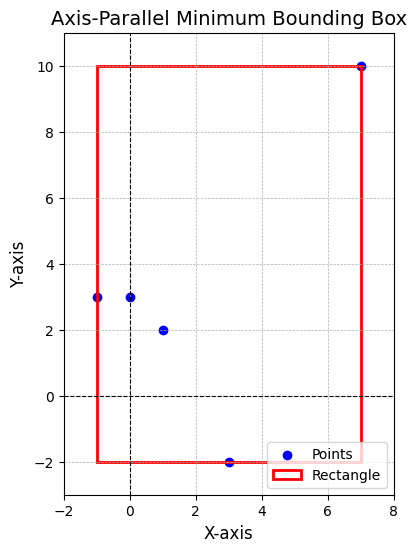

In [113]:
plot_points_and_rectangle(X, l=box[0], r=box[1], b=box[2], t=box[3], title="Axis-Parallel Minimum Bounding Box")